<a href="https://colab.research.google.com/github/SDSPRASAD546/Machine-Learning/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
#importing modules
from sklearn.model_selection import train_test_split 
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report


In [26]:
#importing iris dataset
data =datasets.load_iris()
x = pd.DataFrame(data.data)
y = pd.DataFrame(data.target)


sklearn.utils._bunch.Bunch

**Performing EDA on dataset**

In [25]:
#finding the shape
x.shape,y.shape

((150, 4), (150, 1))

In [47]:
#what data is inside the variables
x,y

(       0    1    2    3
 0    5.1  3.5  1.4  0.2
 1    4.9  3.0  1.4  0.2
 2    4.7  3.2  1.3  0.2
 3    4.6  3.1  1.5  0.2
 4    5.0  3.6  1.4  0.2
 ..   ...  ...  ...  ...
 145  6.7  3.0  5.2  2.3
 146  6.3  2.5  5.0  1.9
 147  6.5  3.0  5.2  2.0
 148  6.2  3.4  5.4  2.3
 149  5.9  3.0  5.1  1.8
 
 [150 rows x 4 columns],
      0
 0    0
 1    0
 2    0
 3    0
 4    0
 ..  ..
 145  2
 146  2
 147  2
 148  2
 149  2
 
 [150 rows x 1 columns])

In [27]:
#describing the data in x 
x.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [58]:
#checking the null values
x.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

**Train and test spliting data**

In [52]:
#splitting the train and test data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=30)
xtrain,ytrain

(       0    1    2    3
 139  6.9  3.1  5.4  2.1
 81   5.5  2.4  3.7  1.0
 112  6.8  3.0  5.5  2.1
 127  6.1  3.0  4.9  1.8
 118  7.7  2.6  6.9  2.3
 ..   ...  ...  ...  ...
 53   5.5  2.3  4.0  1.3
 130  7.4  2.8  6.1  1.9
 140  6.7  3.1  5.6  2.4
 45   4.8  3.0  1.4  0.3
 37   4.9  3.6  1.4  0.1
 
 [120 rows x 4 columns],
      0
 139  2
 81   1
 112  2
 127  2
 118  2
 ..  ..
 53   1
 130  2
 140  2
 45   0
 37   0
 
 [120 rows x 1 columns])

**Performing Niave Bayes algorithm**

In [53]:
#performing naive bayes algorithm
cls = GaussianNB()
cls.fit(xtrain,ytrain)
predict = cls.predict(xtest)
predict

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 2, 2, 2, 2, 0, 1])

In [56]:
#checking the metric i.e is confusion matrix
confusion_matrix(ytest,predict)

array([[12,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  8]])

In [57]:
#checking the score
cls.score(xtest,ytest)

0.9333333333333333

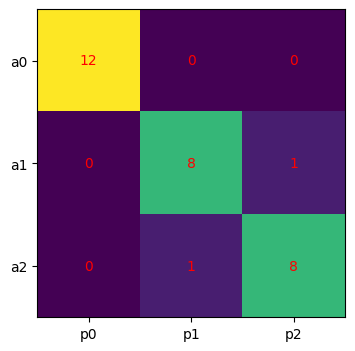

In [64]:
#visuializing the confusion matrix
cm = confusion_matrix(ytest,predict)
fig,v = plt.subplots(figsize=(4,4))
v.imshow(cm)
v.grid(False)
v.xaxis.set(ticks=(0,1,2),ticklabels=('p0','p1','p2'))
v.yaxis.set(ticks=(0,1,2),ticklabels=('a0','a1','a2'))
for i in range(3):
  for j in range(3):
    v.text(i,j,cm[i,j],ha='center',va='center',color='red')

In [61]:
# display classification report of the model
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.89      0.89         9
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

